This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     2876
Number of nonzeros in inequality constraint Jacobian.:     1125
Number of nonzeros in Lagrangian Hessian.............:     1520

Total number of variables............................:      919
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      526
Total number of inequality constraints...............:      666
        inequality constraints with only lower bounds:      257
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      409

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

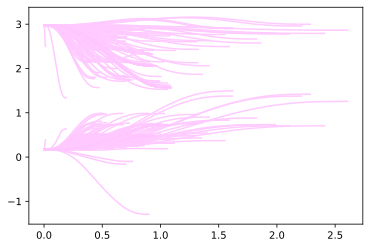

In [10]:
#%%
import numpy as np
import matplotlib.pyplot as plt
import colour as clr
import time

import sys, os
sys.path.append(os.getcwd())
cwd = os.getcwd()
sys.path.append(cwd.rsplit('/', 1)[0])
import ReachingModels as reaching
import plotpresentlib as pp

#0.0560    0.1120     0.1680    0.2240    0.2800
distcolors = pp.bluegreen(5)

sim = reaching.DoublePendulum()
%config InlineBackend.figure_formats = ['svg']

timeVal = 5
optiP = sim.movementTimeNoXSetup(
  theTimeValuation  = timeVal, 
  theN              = 50)

doplot = 0
xystart = np.array([0,0.1])
trajp5, optip5 = sim.updateNoXAndSolve(optiP, 
  xystart, 
  theYBoundary = .15, 
  theDurationInitial = 0.5,
  theTimeValuation = timeVal,
  theGeneratePlots = doplot)

traj1, opti1 = sim.updateNoXAndSolve(optiP, 
  xystart, 
  theYBoundary = .2, 
  theDurationInitial = 0.5,
  theTimeValuation = timeVal,
  theGeneratePlots = doplot)

traj2, opti2 = sim.updateNoXAndSolve(optiP, 
  xystart, 
  theYBoundary = .3, 
  theDurationInitial = 0.5,
  theTimeValuation = timeVal,
  theGeneratePlots = doplot)

traj3, opti3 = sim.updateNoXAndSolve(optiP, 
  xystart, 
  theYBoundary = .4, 
  theDurationInitial = 0.5,
  theTimeValuation = timeVal,
  theGeneratePlots = doplot)

traj4, opti4 = sim.updateNoXAndSolve(optiP, 
  xystart, 
  theYBoundary = .5, 
  theDurationInitial = 0.5,
  theTimeValuation = timeVal,
  theGeneratePlots = doplot)

(-0.1, 0.6, -0.1, 0.6)

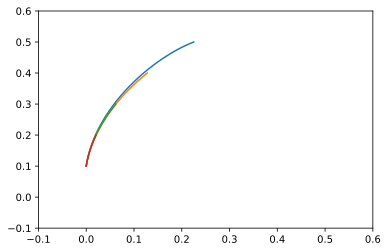

In [11]:
fig,ax = plt.subplots()
ax.plot(traj4.hand[0,:].T,traj4.hand[1,:].T,
  traj3.hand[0,:].T,traj3.hand[1,:].T,
  traj2.hand[0,:].T,traj2.hand[1,:].T,
  traj1.hand[0,:].T,traj1.hand[1,:].T)

ax.axis([-0.1,.6,-0.1,.6])


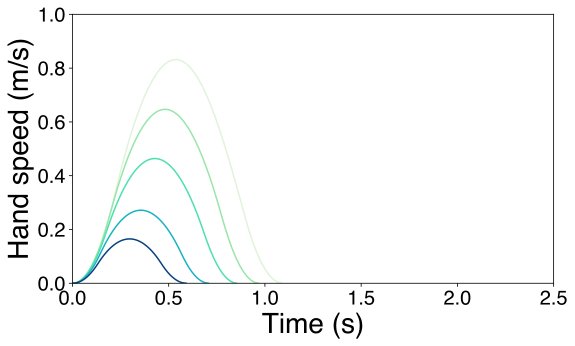

In [14]:
#%% plot the bells for different distances
fig,ax = plt.subplots()
ax.plot(traj4.time.T,traj4.handspeed, color = distcolors[0].get_hex())
ax.plot(traj3.time,traj3.handspeed, color = distcolors[1].get_hex())
ax.plot(traj2.time,traj2.handspeed, color = distcolors[2].get_hex())
ax.plot(traj1.time,traj1.handspeed, color = distcolors[3].get_hex())
ax.plot(trajp5.time,trajp5.handspeed, color = distcolors[4].get_hex())
ax.set_ylim([0,1])
ax.set_xlim([0,2.5])
ax.set_xlabel("Time (s)")
ax.set_ylabel("Hand speed (m/s)")
pp.figurefyTalk()


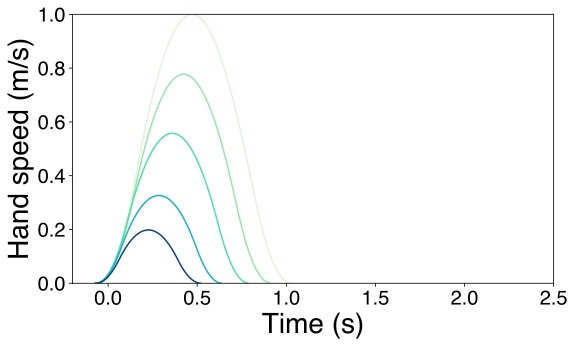

In [17]:
#%% plot the bells for different distances, align with thresh like data figure. 
fig,ax = plt.subplots()
trajs = [traj4,traj3,traj2,traj1,trajp5]
# it = traj4
maxspeed4norm = traj4.handspeed.max()
for it,col in zip(trajs,distcolors):
  t = it.time
  dt = t[1]-t[0]
  thresh = 0.02
  indThresh = [i for i in range(len(t)) if it.handspeed[i] > thresh]
  t = t-((indThresh[0])*dt)
  ax.plot(t,it.handspeed/maxspeed4norm, color = col.get_hex())

ax.set_ylim([0,1])
ax.set_xlim([-0.2,2.5])
ax.set_xlabel("Time (s)")
ax.set_ylabel("Hand speed (m/s)")
pp.figurefyMatch()